In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../DB_access')
sys.path.append('../CustomLib/')
import credentials as cred
import vimet as vim

In [2]:
from sqlalchemy import create_engine


driver = cred.driver()
user = cred.user()
password = cred.password()
ip = cred.ip()
database = cred.database()

connection_string = f'{driver}//{user}:{password}@{ip}/{database}'
engine = create_engine(connection_string)

In [3]:
items = pd.read_sql('items', con = engine)
orders = pd.read_sql('orders', con = engine)
customers = pd.read_sql('customers', con = engine)

In [4]:
items.head()

,index,Name,Lineitem quantity,Lineitem name,Lineitem price,Lineitem fulfillment status,Cancelled at,Refunded Amount,Vendor,Lineitem discount,tags
0,0,#1248,4,Plátano Canarias - 3/4 unidades,1.95,fulfilled,not cancelled,0.0,Fruites i Verdures Rovira,0,Plátano
1,1,#1248,2,Fresón Maresme - 1 caja (500 grs.),3.50,fulfilled,not cancelled,0.0,Fruites i Verdures Rovira,0,Fresón
2,2,#1248,1,Tomate Cherry - 200 grs,1.30,fulfilled,not cancelled,0.0,Fruites i Verdures Rovira,0,Tomate
3,3,#1248,1,Nueces California sin cáscara - 200 grs,3.44,fulfilled,not cancelled,0.0,Llegums Porta Novau,0,Nuez
4,4,#1248,3,Mandarina Orri - 500 grs.,2.00,fulfilled,not cancelled,0.0,Fruites i Verdures Rovira,0,Mandarina


# Items that sell well together

We will try to find the items that are best selling as a combination. To do so we will create a matrix with all the times two items appear together divided by the total number of times the first item appears.

In [5]:
# We create a matrix with the relative frequency two items appear together
all_tags = list(items['tags'].unique())
matrix = vim.matrix_best_items(items, all_tags)

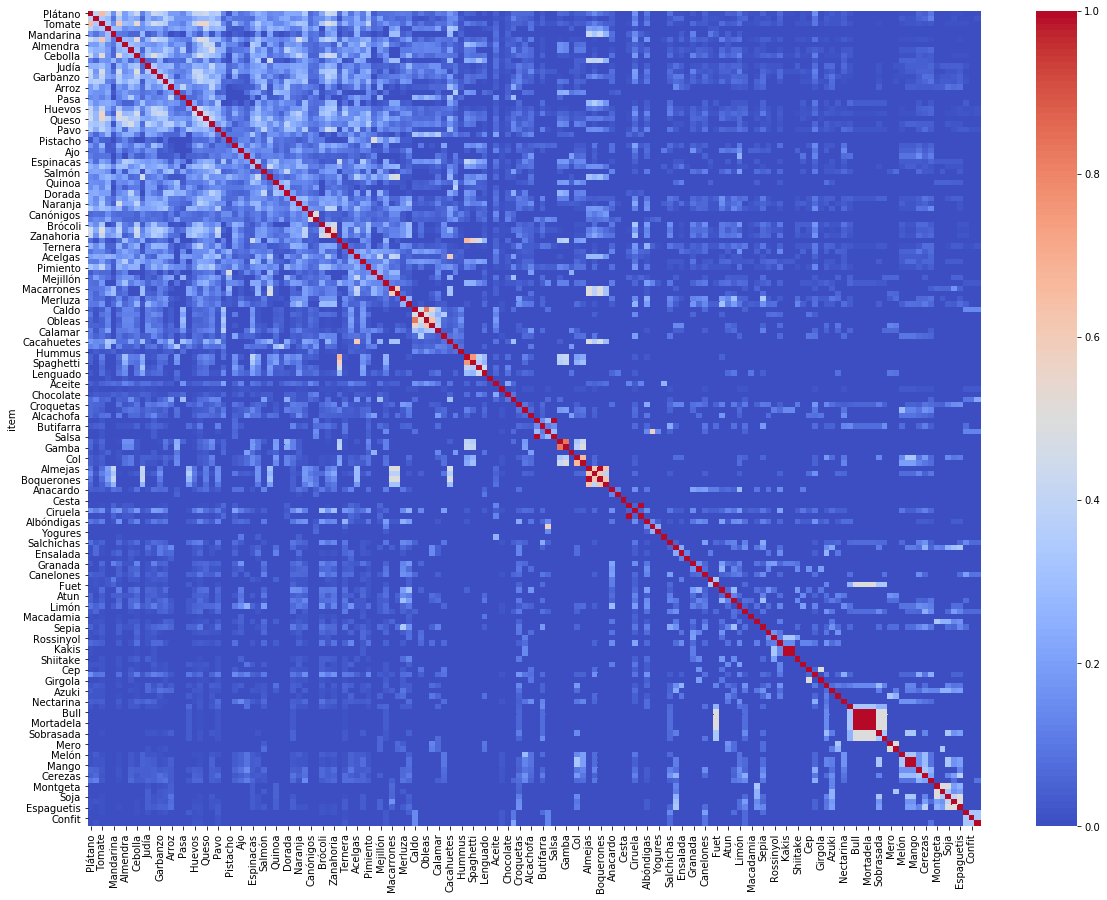

In [6]:
plt.figure(figsize=(20,15))
cmap = sns.color_palette("coolwarm", 128)
sns.heatmap(matrix, cmap=cmap)

plt.show()

if we do this for the top selling products:

In [7]:
#We'll take the top 20 selling products
top_20 = list(items.groupby('tags').sum()['Lineitem quantity'].sort_values(ascending=False).head(20).index)

matrix_20 = vim.matrix_best_items(items, top_20)

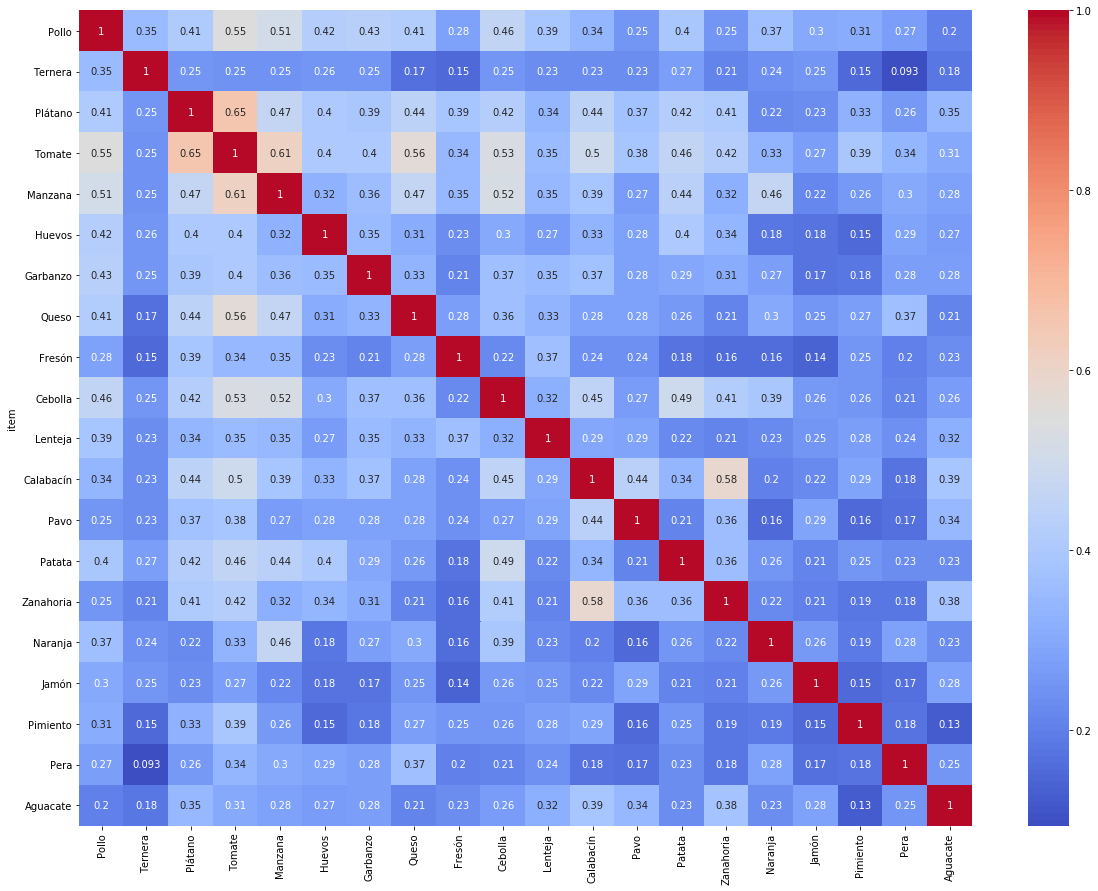

In [8]:
plt.figure(figsize=(20,15))
cmap = sns.color_palette("coolwarm", 128)
sns.heatmap(matrix_20, cmap=cmap, annot=True)

plt.show()

In [9]:
# And for the presentation, the top5 selling products
top_5 = list(items.groupby('tags').sum()['Lineitem quantity'].sort_values(ascending=False).head().index)

matrix_5 = vim.matrix_best_items(items, top_5)

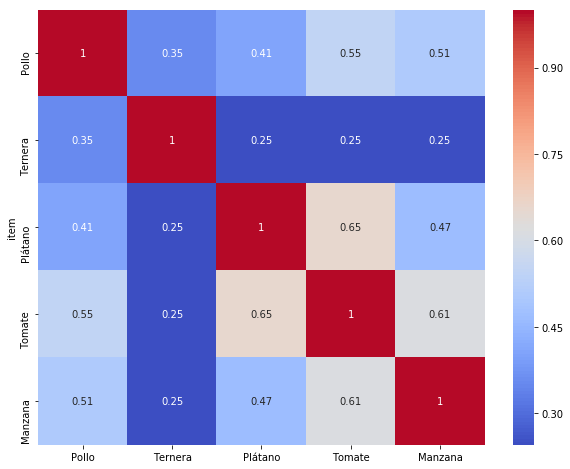

In [10]:
plt.figure(figsize=(10,8))
cmap = sns.color_palette("coolwarm", 128)
sns.heatmap(matrix_5, cmap=cmap, annot=True)

plt.show()

We will do the same per type of food

In [11]:
items = vim.group_tags(items) 

In [12]:
items.head()

,index,Name,Lineitem quantity,Lineitem name,Lineitem price,Lineitem fulfillment status,Cancelled at,Refunded Amount,Vendor,Lineitem discount,tags,group_tags
0,0,#1248,4,Plátano Canarias - 3/4 unidades,1.95,fulfilled,not cancelled,0.0,Fruites i Verdures Rovira,0,Plátano,Frutas
1,1,#1248,2,Fresón Maresme - 1 caja (500 grs.),3.50,fulfilled,not cancelled,0.0,Fruites i Verdures Rovira,0,Fresón,Frutas
2,2,#1248,1,Tomate Cherry - 200 grs,1.30,fulfilled,not cancelled,0.0,Fruites i Verdures Rovira,0,Tomate,Verduras
3,3,#1248,1,Nueces California sin cáscara - 200 grs,3.44,fulfilled,not cancelled,0.0,Llegums Porta Novau,0,Nuez,Frutos secos
4,4,#1248,3,Mandarina Orri - 500 grs.,2.00,fulfilled,not cancelled,0.0,Fruites i Verdures Rovira,0,Mandarina,Frutas


In [13]:
items['group_tags'].unique()

array(['Frutas', 'Verduras', 'Frutos secos', 'Legumbres', 'Patata',
       'Cereales', 'Carne blanca', 'Huevos', 'Lácteos', 'Especias',
       'Pescado', 'Carne roja', 'Carne procesada', 'Others', 'Dulces',
       'Aceite'], dtype=object)

In [14]:
# We create a Dataframe for the 2 main groups (the ones with more items and more frequency)
frutas_df = items[items['group_tags']=='Frutas']
verduras_df = items[items['group_tags']=='Verduras']

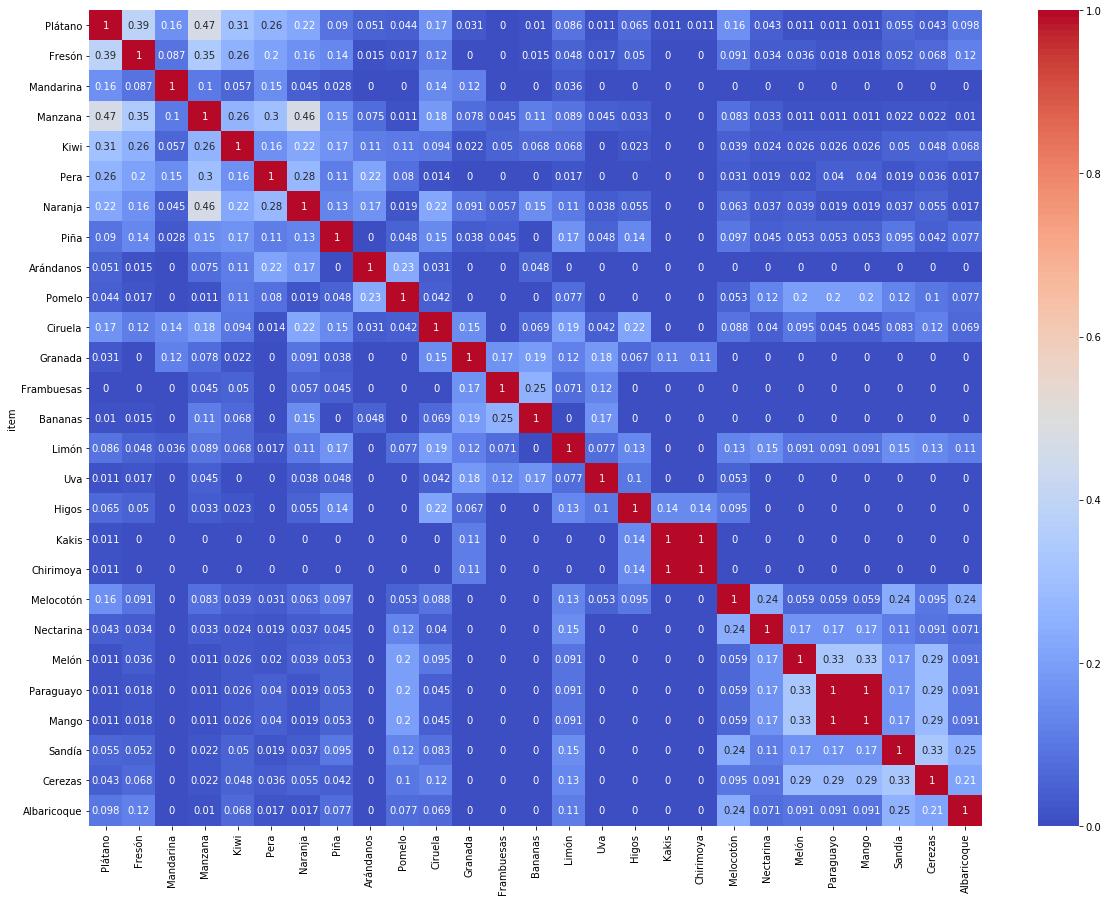

In [15]:
plt.figure(figsize=(20,15))
cmap = sns.color_palette("coolwarm", 128)
sns.heatmap(vim.food_matrix(frutas_df), cmap=cmap, annot=True)

plt.show()

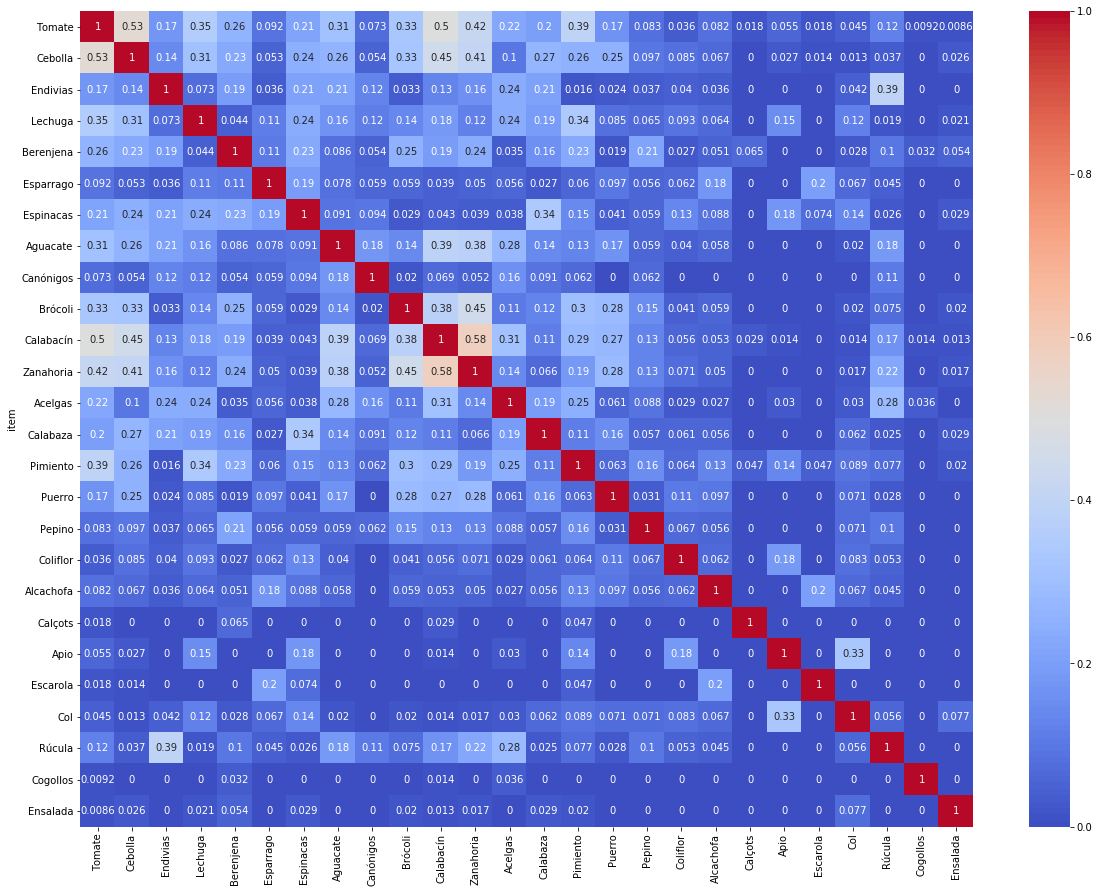

In [16]:
plt.figure(figsize=(20,15))
cmap = sns.color_palette("coolwarm", 128)
sns.heatmap(vim.food_matrix(verduras_df), cmap=cmap, annot=True)

plt.show()